In [19]:

""" data visualization  and graphical plotting library """
import matplotlib
import matplotlib . pyplot as plt
plt.style.use('dark_background')
"""   My libraray """
from mylib.EM_pMLE import *
"""   Generate data library"""
from sklearn.datasets import make_blobs
n_samples_ = 1000
k = 20
X, y_true = make_blobs(n_samples=n_samples_,
                       n_features = 2 , centers=k,
                       cluster_std=0.5,
                       random_state=0)

In [20]:
%%time
model = EM_pMLE().fit(X , n_components = k)

Wall time: 3.05 s


In [21]:
%%time
"""predictions data testing  """
labels = model.predict(X)

Wall time: 18 ms


In [22]:
"""test convergence """
model.converged , model.max_iters

(True, 18)

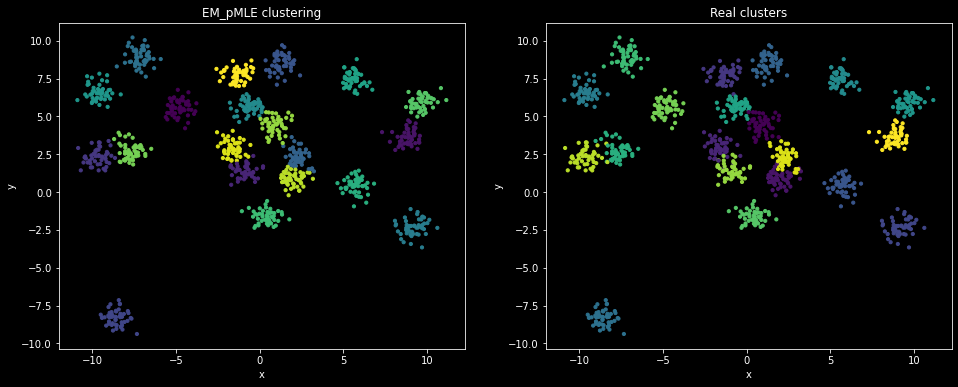

In [23]:
"""Plotting data """
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:,0], X[:,1], s = 10  ,c = labels , cmap='viridis')
ax2.scatter(X[:,0], X[:,1], s = 10 , c = y_true, cmap='viridis')
ax1.set_title('EM_pMLE clustering')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Real clusters')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

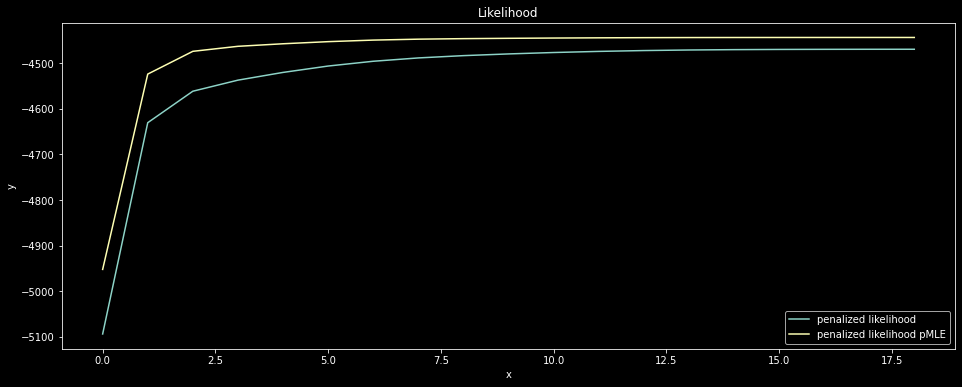

In [24]:

max_likelihood = np.array(model.max_likelihood)[: , 0 ]
max_likelihood_limited =  np.array(model.max_likelihood)[: , 1]
""" Plotting data """
fig = plt.figure(figsize=(16,6))
plt.plot(range(len(max_likelihood)), max_likelihood )
plt.plot(range(len(max_likelihood_limited)), max_likelihood_limited )
plt.title('Likelihood')
plt.legend(["penalized likelihood", "penalized likelihood pMLE"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()